# Add forbidden z region

In [1]:
import molsysmt as msm

In [2]:
import openmm as mm
from openmm import unit
from openmm import app
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

In [3]:
system = mm.System()
system.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [4]:
msm.thirds.openmm.forces.add_forbidden_z_region(system, z0='1.0 nm', width='1.5 nm',
                                              force_constant = '5000 kilojoules/(mol*angstroms**2)',
                                              pbc=True)

0

In [5]:
# Formalismo NVT
temperature = 300*unit.kelvin

In [6]:
integration_timestep = 2.0*unit.femtoseconds
saving_timestep = 1.00*unit.picoseconds
simulation_time = 1000.*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

In [7]:
friction   = 5.0/unit.picoseconds
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

In [8]:
platform = mm.Platform.getPlatformByName('OpenCL')

In [9]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.nanometers
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.nanometers/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

In [10]:
initial_positions  = [[0.0, 0.0, 2.0]] * unit.nanometers

In [11]:
context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)

In [12]:
L = 2.0
v1 = [L,0,0] * unit.nanometers
v2 = [0,L,0] * unit.nanometers
v3 = [0,0,L] * unit.nanometers
L = L * unit.nanometers
context.setPeriodicBoxVectors(v1, v2, v3)

In [13]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [14]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [15]:
for ii in tqdm(range(1,num_saving_steps)):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()

  0%|                                                                                                                                                | 0/999 [00:00<?, ?it/s]

  0%|▎                                                                                                                                       | 2/999 [00:00<00:56, 17.78it/s]

  0%|▌                                                                                                                                       | 4/999 [00:00<00:52, 18.95it/s]

  1%|▉                                                                                                                                       | 7/999 [00:00<00:44, 22.20it/s]

  1%|█▍                                                                                                                                     | 11/999 [00:00<00:36, 27.00it/s]

  2%|██                                                                                                                                     | 15/999 [00:00<00:34, 28.26it/s]

  2%|██▌                                                                                                                                    | 19/999 [00:00<00:33, 29.69it/s]

  2%|███                                                                                                                                    | 23/999 [00:00<00:31, 31.12it/s]

  3%|███▋                                                                                                                                   | 27/999 [00:00<00:30, 32.30it/s]

  3%|████▏                                                                                                                                  | 31/999 [00:01<00:28, 33.95it/s]

  4%|████▋                                                                                                                                  | 35/999 [00:01<00:28, 33.82it/s]

  4%|█████▎                                                                                                                                 | 39/999 [00:01<00:28, 33.63it/s]

  4%|█████▊                                                                                                                                 | 43/999 [00:01<00:28, 33.65it/s]

  5%|██████▎                                                                                                                                | 47/999 [00:01<00:32, 29.08it/s]

  5%|██████▉                                                                                                                                | 51/999 [00:01<00:31, 30.28it/s]

  6%|███████▍                                                                                                                               | 55/999 [00:01<00:30, 31.30it/s]

  6%|███████▉                                                                                                                               | 59/999 [00:01<00:29, 32.05it/s]

  6%|████████▌                                                                                                                              | 63/999 [00:02<00:28, 32.63it/s]

  7%|█████████                                                                                                                              | 67/999 [00:02<00:28, 33.03it/s]

  7%|█████████▌                                                                                                                             | 71/999 [00:02<00:27, 33.34it/s]

  8%|██████████▏                                                                                                                            | 75/999 [00:02<00:27, 33.59it/s]

  8%|██████████▋                                                                                                                            | 79/999 [00:02<00:27, 33.66it/s]

  8%|███████████▏                                                                                                                           | 83/999 [00:02<00:27, 33.46it/s]

  9%|███████████▊                                                                                                                           | 87/999 [00:02<00:27, 33.13it/s]

  9%|████████████▎                                                                                                                          | 91/999 [00:02<00:27, 33.34it/s]

 10%|████████████▊                                                                                                                          | 95/999 [00:03<00:27, 33.42it/s]

 10%|█████████████▍                                                                                                                         | 99/999 [00:03<00:26, 33.54it/s]

 10%|█████████████▊                                                                                                                        | 103/999 [00:03<00:30, 29.18it/s]

 11%|██████████████▎                                                                                                                       | 107/999 [00:03<00:29, 30.34it/s]

 11%|██████████████▉                                                                                                                       | 111/999 [00:03<00:31, 27.81it/s]

 12%|███████████████▍                                                                                                                      | 115/999 [00:03<00:30, 29.25it/s]

 12%|████████████████                                                                                                                      | 120/999 [00:03<00:26, 33.79it/s]

 13%|████████████████▉                                                                                                                     | 126/999 [00:03<00:23, 37.92it/s]

 13%|█████████████████▍                                                                                                                    | 130/999 [00:04<00:22, 38.10it/s]

 13%|█████████████████▉                                                                                                                    | 134/999 [00:04<00:26, 32.32it/s]

 14%|██████████████████▌                                                                                                                   | 138/999 [00:04<00:26, 32.43it/s]

 14%|███████████████████                                                                                                                   | 142/999 [00:04<00:26, 32.95it/s]

 15%|███████████████████▌                                                                                                                  | 146/999 [00:04<00:25, 33.54it/s]

 15%|████████████████████                                                                                                                  | 150/999 [00:04<00:24, 34.89it/s]

 15%|████████████████████▋                                                                                                                 | 154/999 [00:04<00:24, 34.50it/s]

 16%|█████████████████████▏                                                                                                                | 158/999 [00:04<00:24, 33.77it/s]

 16%|█████████████████████▋                                                                                                                | 162/999 [00:05<00:24, 33.53it/s]

 17%|██████████████████████▎                                                                                                               | 166/999 [00:05<00:24, 33.54it/s]

 17%|██████████████████████▊                                                                                                               | 170/999 [00:05<00:24, 33.72it/s]

 17%|███████████████████████▎                                                                                                              | 174/999 [00:05<00:24, 33.76it/s]

 18%|███████████████████████▉                                                                                                              | 178/999 [00:05<00:24, 33.65it/s]

 18%|████████████████████████▍                                                                                                             | 182/999 [00:05<00:24, 33.52it/s]

 19%|████████████████████████▉                                                                                                             | 186/999 [00:05<00:24, 33.57it/s]

 19%|█████████████████████████▍                                                                                                            | 190/999 [00:05<00:24, 33.60it/s]

 19%|██████████████████████████                                                                                                            | 194/999 [00:05<00:23, 33.67it/s]

 20%|██████████████████████████▌                                                                                                           | 198/999 [00:06<00:23, 33.64it/s]

 20%|███████████████████████████                                                                                                           | 202/999 [00:06<00:23, 33.47it/s]

 21%|███████████████████████████▋                                                                                                          | 206/999 [00:06<00:23, 33.41it/s]

 21%|████████████████████████████▏                                                                                                         | 210/999 [00:06<00:23, 33.46it/s]

 21%|████████████████████████████▋                                                                                                         | 214/999 [00:06<00:23, 33.51it/s]

 22%|█████████████████████████████▏                                                                                                        | 218/999 [00:06<00:22, 34.10it/s]

 22%|█████████████████████████████▊                                                                                                        | 222/999 [00:06<00:22, 33.81it/s]

 23%|██████████████████████████████▎                                                                                                       | 226/999 [00:06<00:22, 33.90it/s]

 23%|██████████████████████████████▊                                                                                                       | 230/999 [00:07<00:22, 33.65it/s]

 23%|███████████████████████████████▍                                                                                                      | 234/999 [00:07<00:22, 33.48it/s]

 24%|███████████████████████████████▉                                                                                                      | 238/999 [00:07<00:22, 33.22it/s]

 24%|████████████████████████████████▍                                                                                                     | 242/999 [00:07<00:22, 33.28it/s]

 25%|████████████████████████████████▉                                                                                                     | 246/999 [00:07<00:22, 32.98it/s]

 25%|█████████████████████████████████▌                                                                                                    | 250/999 [00:07<00:24, 30.11it/s]

 26%|██████████████████████████████████▎                                                                                                   | 256/999 [00:07<00:20, 35.79it/s]

 26%|███████████████████████████████████▏                                                                                                  | 262/999 [00:07<00:18, 39.52it/s]

 27%|███████████████████████████████████▊                                                                                                  | 267/999 [00:08<00:19, 38.06it/s]

 27%|████████████████████████████████████▎                                                                                                 | 271/999 [00:08<00:19, 37.98it/s]

 28%|████████████████████████████████████▉                                                                                                 | 275/999 [00:08<00:19, 36.71it/s]

 28%|█████████████████████████████████████▍                                                                                                | 279/999 [00:08<00:20, 35.73it/s]

 28%|█████████████████████████████████████▉                                                                                                | 283/999 [00:08<00:20, 35.09it/s]

 29%|██████████████████████████████████████▍                                                                                               | 287/999 [00:08<00:20, 34.67it/s]

 29%|███████████████████████████████████████                                                                                               | 291/999 [00:08<00:20, 34.28it/s]

 30%|███████████████████████████████████████▌                                                                                              | 295/999 [00:08<00:20, 34.05it/s]

 30%|████████████████████████████████████████                                                                                              | 299/999 [00:09<00:20, 33.90it/s]

 30%|████████████████████████████████████████▋                                                                                             | 303/999 [00:09<00:20, 34.03it/s]

 31%|█████████████████████████████████████████▏                                                                                            | 307/999 [00:09<00:20, 34.18it/s]

 31%|█████████████████████████████████████████▋                                                                                            | 311/999 [00:09<00:20, 34.25it/s]

 32%|██████████████████████████████████████████▎                                                                                           | 315/999 [00:09<00:20, 34.20it/s]

 32%|██████████████████████████████████████████▊                                                                                           | 319/999 [00:09<00:19, 34.30it/s]

 32%|███████████████████████████████████████████▎                                                                                          | 323/999 [00:09<00:22, 29.59it/s]

 33%|███████████████████████████████████████████▊                                                                                          | 327/999 [00:09<00:21, 30.79it/s]

 33%|████████████████████████████████████████████▌                                                                                         | 332/999 [00:10<00:19, 34.94it/s]

 34%|█████████████████████████████████████████████                                                                                         | 336/999 [00:10<00:18, 35.72it/s]

 34%|█████████████████████████████████████████████▌                                                                                        | 340/999 [00:10<00:18, 36.42it/s]

 34%|██████████████████████████████████████████████▏                                                                                       | 344/999 [00:10<00:17, 36.91it/s]

 35%|██████████████████████████████████████████████▋                                                                                       | 348/999 [00:10<00:17, 37.20it/s]

 35%|███████████████████████████████████████████████▏                                                                                      | 352/999 [00:10<00:17, 36.95it/s]

 36%|███████████████████████████████████████████████▊                                                                                      | 356/999 [00:10<00:17, 37.17it/s]

 36%|████████████████████████████████████████████████▎                                                                                     | 360/999 [00:10<00:17, 36.54it/s]

 36%|████████████████████████████████████████████████▊                                                                                     | 364/999 [00:10<00:17, 35.62it/s]

 37%|█████████████████████████████████████████████████▎                                                                                    | 368/999 [00:11<00:17, 35.50it/s]

 37%|█████████████████████████████████████████████████▉                                                                                    | 372/999 [00:11<00:17, 36.09it/s]

 38%|██████████████████████████████████████████████████▍                                                                                   | 376/999 [00:11<00:17, 35.47it/s]

 38%|███████████████████████████████████████████████████                                                                                   | 381/999 [00:11<00:16, 37.74it/s]

 39%|███████████████████████████████████████████████████▋                                                                                  | 385/999 [00:11<00:16, 37.80it/s]

 39%|████████████████████████████████████████████████████▏                                                                                 | 389/999 [00:11<00:16, 37.82it/s]

 39%|████████████████████████████████████████████████████▋                                                                                 | 393/999 [00:11<00:15, 37.88it/s]

 40%|█████████████████████████████████████████████████████▎                                                                                | 397/999 [00:11<00:15, 37.80it/s]

 40%|█████████████████████████████████████████████████████▊                                                                                | 401/999 [00:11<00:15, 37.88it/s]

 41%|██████████████████████████████████████████████████████▎                                                                               | 405/999 [00:11<00:15, 38.00it/s]

 41%|██████████████████████████████████████████████████████▊                                                                               | 409/999 [00:12<00:15, 37.91it/s]

 41%|███████████████████████████████████████████████████████▍                                                                              | 413/999 [00:12<00:15, 37.92it/s]

 42%|███████████████████████████████████████████████████████▉                                                                              | 417/999 [00:12<00:15, 37.69it/s]

 42%|████████████████████████████████████████████████████████▋                                                                             | 423/999 [00:12<00:13, 42.54it/s]

 43%|█████████████████████████████████████████████████████████▍                                                                            | 428/999 [00:12<00:13, 41.86it/s]

 43%|██████████████████████████████████████████████████████████                                                                            | 433/999 [00:12<00:14, 39.27it/s]

 44%|██████████████████████████████████████████████████████████▌                                                                           | 437/999 [00:12<00:14, 38.06it/s]

 44%|███████████████████████████████████████████████████████████▏                                                                          | 441/999 [00:12<00:14, 38.21it/s]

 45%|███████████████████████████████████████████████████████████▋                                                                          | 445/999 [00:13<00:15, 36.55it/s]

 45%|████████████████████████████████████████████████████████████▏                                                                         | 449/999 [00:13<00:15, 35.42it/s]

 45%|████████████████████████████████████████████████████████████▊                                                                         | 453/999 [00:13<00:17, 30.45it/s]

 46%|█████████████████████████████████████████████████████████████▎                                                                        | 457/999 [00:13<00:17, 31.43it/s]

 46%|█████████████████████████████████████████████████████████████▊                                                                        | 461/999 [00:13<00:16, 32.12it/s]

 47%|██████████████████████████████████████████████████████████████▎                                                                       | 465/999 [00:13<00:16, 32.59it/s]

 47%|██████████████████████████████████████████████████████████████▉                                                                       | 469/999 [00:13<00:16, 33.03it/s]

 47%|███████████████████████████████████████████████████████████████▍                                                                      | 473/999 [00:13<00:15, 33.55it/s]

 48%|███████████████████████████████████████████████████████████████▉                                                                      | 477/999 [00:14<00:15, 34.06it/s]

 48%|████████████████████████████████████████████████████████████████▌                                                                     | 481/999 [00:14<00:15, 33.93it/s]

 49%|█████████████████████████████████████████████████████████████████                                                                     | 485/999 [00:14<00:15, 33.92it/s]

 49%|█████████████████████████████████████████████████████████████████▌                                                                    | 489/999 [00:14<00:14, 35.16it/s]

 50%|██████████████████████████████████████████████████████████████████▍                                                                   | 495/999 [00:14<00:12, 41.04it/s]

 50%|███████████████████████████████████████████████████████████████████                                                                   | 500/999 [00:14<00:11, 42.27it/s]

 51%|███████████████████████████████████████████████████████████████████▋                                                                  | 505/999 [00:14<00:12, 40.74it/s]

 51%|████████████████████████████████████████████████████████████████████▍                                                                 | 510/999 [00:14<00:12, 39.50it/s]

 52%|█████████████████████████████████████████████████████████████████████                                                                 | 515/999 [00:14<00:11, 41.12it/s]

 52%|█████████████████████████████████████████████████████████████████████▉                                                                | 521/999 [00:15<00:10, 44.79it/s]

 53%|██████████████████████████████████████████████████████████████████████▌                                                               | 526/999 [00:15<00:10, 46.01it/s]

 53%|███████████████████████████████████████████████████████████████████████▏                                                              | 531/999 [00:15<00:10, 43.36it/s]

 54%|███████████████████████████████████████████████████████████████████████▉                                                              | 536/999 [00:15<00:11, 40.83it/s]

 54%|████████████████████████████████████████████████████████████████████████▌                                                             | 541/999 [00:15<00:12, 37.87it/s]

 55%|█████████████████████████████████████████████████████████████████████████                                                             | 545/999 [00:15<00:12, 36.42it/s]

 55%|█████████████████████████████████████████████████████████████████████████▋                                                            | 549/999 [00:15<00:12, 35.66it/s]

 55%|██████████████████████████████████████████████████████████████████████████▏                                                           | 553/999 [00:15<00:12, 35.65it/s]

 56%|██████████████████████████████████████████████████████████████████████████▋                                                           | 557/999 [00:16<00:12, 34.76it/s]

 56%|███████████████████████████████████████████████████████████████████████████▏                                                          | 561/999 [00:16<00:12, 34.51it/s]

 57%|███████████████████████████████████████████████████████████████████████████▊                                                          | 565/999 [00:16<00:12, 34.77it/s]

 57%|████████████████████████████████████████████████████████████████████████████▎                                                         | 569/999 [00:16<00:12, 34.43it/s]

 57%|████████████████████████████████████████████████████████████████████████████▊                                                         | 573/999 [00:16<00:12, 33.79it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▍                                                        | 577/999 [00:16<00:12, 33.61it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▉                                                        | 581/999 [00:16<00:14, 29.45it/s]

 59%|██████████████████████████████████████████████████████████████████████████████▍                                                       | 585/999 [00:16<00:13, 29.70it/s]

 59%|███████████████████████████████████████████████████████████████████████████████                                                       | 589/999 [00:17<00:13, 30.65it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▌                                                      | 593/999 [00:17<00:12, 31.38it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▎                                                     | 599/999 [00:17<00:10, 36.93it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▉                                                     | 603/999 [00:17<00:10, 36.72it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████▌                                                    | 608/999 [00:17<00:10, 38.79it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████                                                    | 612/999 [00:17<00:10, 37.03it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████▋                                                   | 616/999 [00:17<00:10, 37.28it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▏                                                  | 620/999 [00:17<00:10, 37.39it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▋                                                  | 624/999 [00:17<00:09, 37.60it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▏                                                 | 628/999 [00:18<00:09, 37.65it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▊                                                 | 632/999 [00:18<00:10, 36.50it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▎                                                | 636/999 [00:18<00:10, 35.14it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▊                                                | 640/999 [00:18<00:11, 30.80it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▍                                               | 644/999 [00:18<00:11, 31.77it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████▉                                               | 648/999 [00:18<00:10, 32.34it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▍                                              | 652/999 [00:18<00:10, 32.68it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████████▉                                              | 656/999 [00:18<00:10, 32.53it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▊                                             | 662/999 [00:19<00:08, 39.16it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████▍                                            | 667/999 [00:19<00:08, 41.34it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▏                                           | 672/999 [00:19<00:08, 39.19it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████▊                                           | 677/999 [00:19<00:08, 38.04it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▎                                          | 681/999 [00:19<00:08, 37.64it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████▉                                          | 685/999 [00:19<00:08, 37.05it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 689/999 [00:19<00:08, 36.74it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 693/999 [00:19<00:08, 36.74it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 697/999 [00:20<00:08, 36.81it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████                                        | 701/999 [00:20<00:08, 36.68it/s]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 705/999 [00:20<00:07, 36.93it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 710/999 [00:20<00:07, 39.97it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 715/999 [00:20<00:07, 39.43it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 719/999 [00:20<00:07, 39.06it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 723/999 [00:20<00:07, 38.79it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 728/999 [00:20<00:06, 40.39it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 733/999 [00:20<00:07, 35.15it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 737/999 [00:21<00:07, 35.79it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 741/999 [00:21<00:07, 32.93it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 745/999 [00:21<00:08, 31.61it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 749/999 [00:21<00:07, 32.20it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 753/999 [00:21<00:07, 33.49it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 757/999 [00:21<00:07, 33.65it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                | 761/999 [00:21<00:07, 33.79it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 765/999 [00:21<00:06, 33.96it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 770/999 [00:22<00:06, 38.16it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 774/999 [00:22<00:06, 33.15it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 778/999 [00:22<00:07, 27.75it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 782/999 [00:22<00:07, 28.96it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 786/999 [00:22<00:07, 29.89it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 790/999 [00:22<00:06, 30.65it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 794/999 [00:22<00:06, 31.24it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 798/999 [00:23<00:07, 27.97it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 802/999 [00:23<00:06, 29.25it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 806/999 [00:23<00:06, 30.41it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 810/999 [00:23<00:06, 31.24it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 815/999 [00:23<00:05, 35.63it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 819/999 [00:23<00:05, 35.15it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 823/999 [00:23<00:05, 34.68it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 829/999 [00:23<00:04, 40.83it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 835/999 [00:24<00:03, 44.24it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 840/999 [00:24<00:03, 40.54it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 845/999 [00:24<00:04, 38.42it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 849/999 [00:24<00:04, 36.87it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 853/999 [00:24<00:04, 35.78it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 857/999 [00:24<00:04, 34.85it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 861/999 [00:24<00:04, 31.95it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 865/999 [00:24<00:04, 28.70it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 868/999 [00:25<00:04, 26.22it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 873/999 [00:25<00:04, 30.80it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 878/999 [00:25<00:03, 33.12it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 882/999 [00:25<00:03, 33.29it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 886/999 [00:25<00:03, 33.48it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 890/999 [00:25<00:03, 33.42it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 894/999 [00:25<00:03, 33.62it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 898/999 [00:25<00:02, 33.69it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 902/999 [00:26<00:03, 32.26it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 906/999 [00:26<00:03, 26.65it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 910/999 [00:26<00:03, 28.17it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 914/999 [00:26<00:02, 29.47it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 918/999 [00:26<00:02, 30.82it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 923/999 [00:26<00:02, 35.05it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 929/999 [00:26<00:01, 41.11it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 935/999 [00:26<00:01, 45.57it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 941/999 [00:27<00:01, 49.00it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 947/999 [00:27<00:01, 51.16it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 953/999 [00:27<00:00, 52.30it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 959/999 [00:27<00:00, 54.04it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 965/999 [00:27<00:00, 54.71it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 971/999 [00:27<00:00, 39.77it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 976/999 [00:27<00:00, 35.24it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 981/999 [00:28<00:00, 31.67it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 985/999 [00:28<00:00, 32.93it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 989/999 [00:28<00:00, 34.05it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 993/999 [00:28<00:00, 34.96it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 997/999 [00:28<00:00, 35.78it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:28<00:00, 34.90it/s]

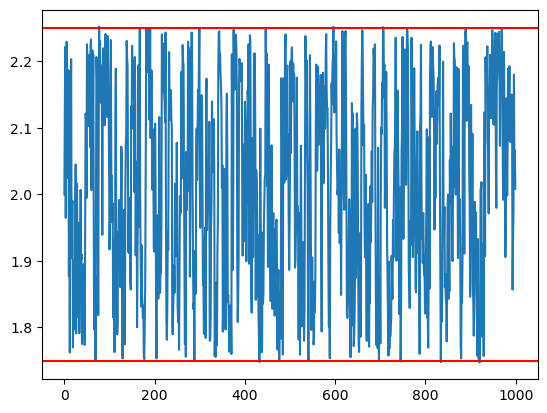

In [16]:
plt.plot(times, positions[:,2])
plt.axhline(y=2.25, color='red', linestyle='-')
plt.axhline(y=1.75, color='red', linestyle='-')
plt.show()